<a href="https://colab.research.google.com/github/nidhi-158/FeynnLabs_EV-market/blob/main/Ev_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [ ]:
df=pd.read_csv("/content/Ev Sales.csv")

In [ ]:
df.columns

Index(['YEAR', '2 W', '3 W', '4 W', 'BUS', 'TOTAL'], dtype='object')

In [ ]:
# Determining categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['YEAR']
Numerical Columns: ['2 W', '3 W', '4 W', 'BUS', 'TOTAL']


In [ ]:
df.drop

<bound method DataFrame.drop of       YEAR       2 W      3 W     4 W    BUS     TOTAL
0   Apr-17      96.0   4748.0   198.0    0.0    5042.0
1   May-17      91.0   6720.0   215.0    2.0    7028.0
2   Jun-17     137.0   7178.0   149.0    1.0    7465.0
3   Jul-17     116.0   8775.0   120.0    0.0    9011.0
4   Aug-17      99.0   8905.0   137.0    0.0    9141.0
..     ...       ...      ...     ...    ...       ...
70  Feb-23   66033.0  35995.0  4850.0   99.0  106977.0
71  Mar-23   86194.0  45225.0  8852.0   89.0  140360.0
72  Apr-23   66755.0  38016.0  6193.0   84.0  111048.0
73  May-23  105154.0  44615.0  7736.0  283.0  157788.0
74     NaN       NaN      NaN     NaN    NaN       NaN

[75 rows x 6 columns]>

In [ ]:
df['YEAR'].unique()

array(['Apr-17', 'May-17', 'Jun-17', 'Jul-17', 'Aug-17', 'Sep-17',
       'Oct-17', 'Nov-17', 'Dec-17', 'Jan-18', 'Feb-18', 'Mar-18',
       'Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18',
       'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19',
       'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19',
       'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20',
       'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20',
       'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21',
       'Apr-21', 'May-21', 'Jun-21', 'Jul-21', 'Aug-21', 'Sep-21',
       'Oct-21', 'Nov-21', 'Dec-21', 'Jan-22', 'Feb-22', 'Mar-22',
       'Apr-22', 'May-22', 'Jun-22', 'Jul-22', 'Aug-22', 'Sep-22',
       'Oct-22', 'Nov-22', 'Dec-22', 'Jan-23', 'Feb-23', 'Mar-23',
       'Apr-23', 'May-23', nan], dtype=object)

In [ ]:
# Convert 'YEAR' to datetime format, assuming it's in 'MMM-YY' format
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%b-%y')

# Extract day, month, and year
df['Day'] = df['YEAR'].dt.day
df['Month'] = df['YEAR'].dt.month
df['Year'] = df['YEAR'].dt.year

In [ ]:
df.head()

,YEAR,2 W,3 W,4 W,BUS,TOTAL,Day,Month,Year
0,2017-04-01,96.0,4748.0,198.0,0.0,5042.0,1.0,4.0,2017.0
1,2017-05-01,91.0,6720.0,215.0,2.0,7028.0,1.0,5.0,2017.0
2,2017-06-01,137.0,7178.0,149.0,1.0,7465.0,1.0,6.0,2017.0
3,2017-07-01,116.0,8775.0,120.0,0.0,9011.0,1.0,7.0,2017.0
4,2017-08-01,99.0,8905.0,137.0,0.0,9141.0,1.0,8.0,2017.0


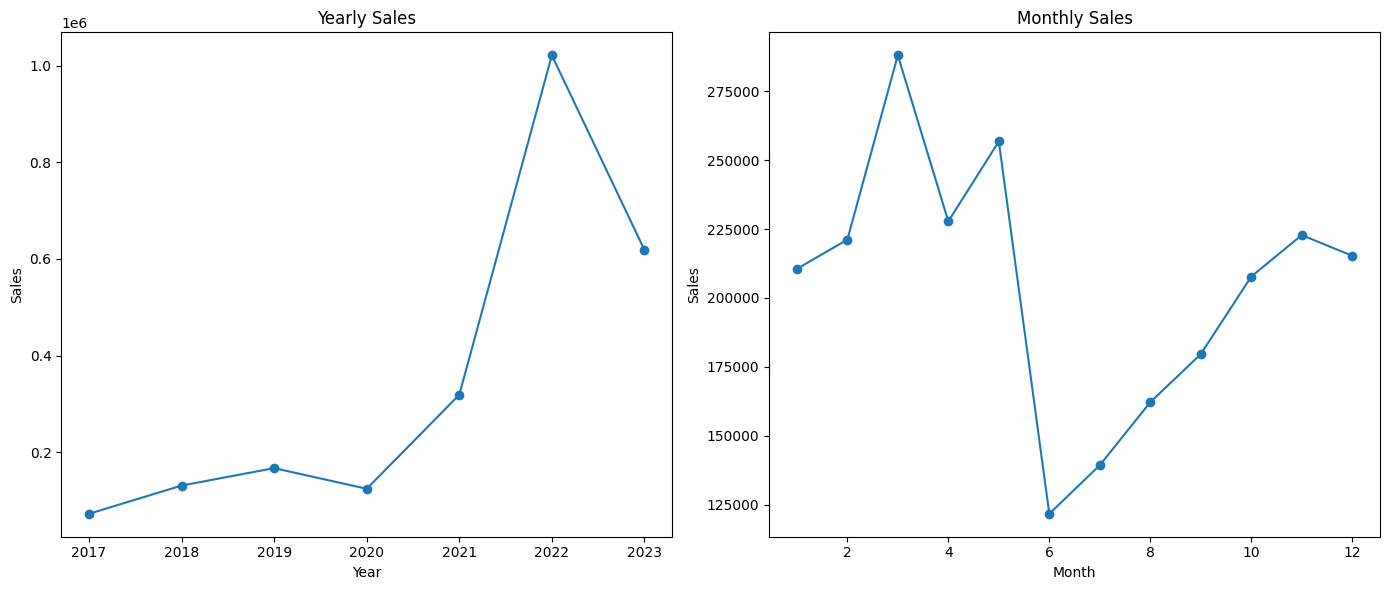

In [ ]:
yearly_sales=df.groupby('Year')['TOTAL'].sum().reset_index()
monthly_sales=df.groupby('Month')['TOTAL'].sum().reset_index()

plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
plt.plot(yearly_sales['Year'], yearly_sales['TOTAL'], marker='o', linestyle='-')
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Sales')

plt.subplot(1,2,2)
plt.plot(monthly_sales['Month'], monthly_sales['TOTAL'], marker='o', linestyle='-')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

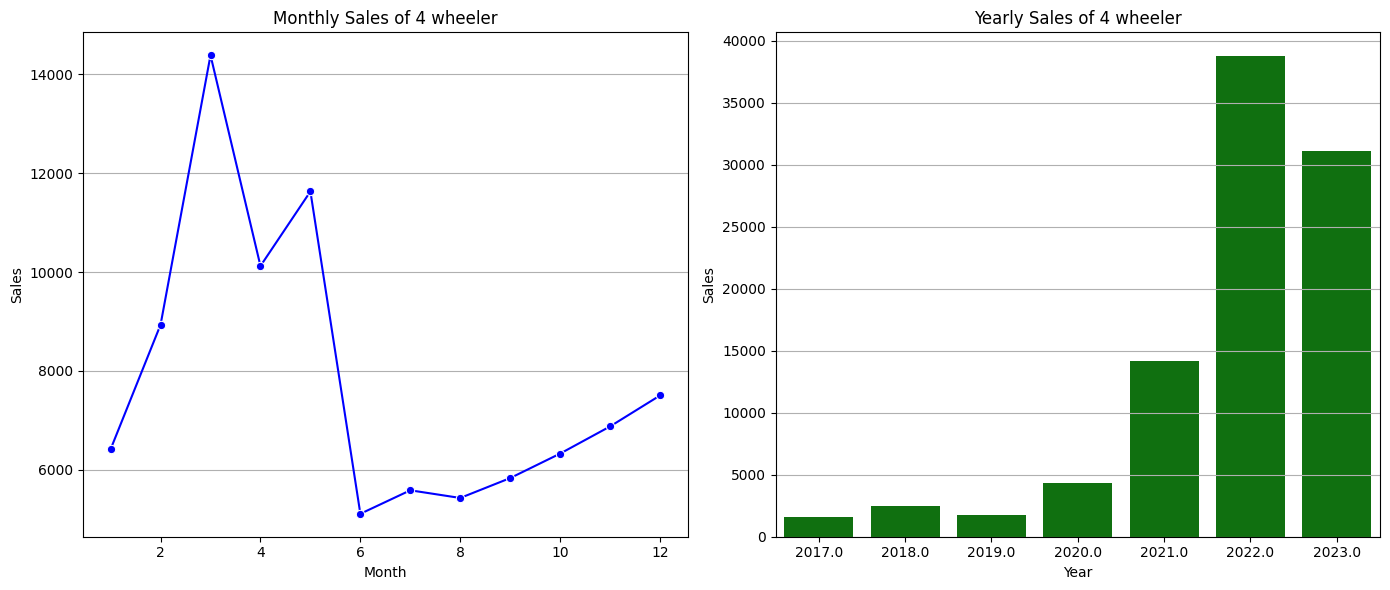

In [ ]:
yearly_sale_4w=df.groupby('Year')['4 W'].sum().reset_index()
monthly_sale_4w=df.groupby('Month')['4 W'].sum().reset_index()

plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
# Pass data as a dictionary for x and y values
sns.lineplot(x='Month', y='4 W', data=monthly_sale_4w, marker='o', linestyle='-', color='blue')
plt.title('Monthly Sales of 4 wheeler')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True, axis='y') # Use grid() and specify 'y' for vertical grid lines

plt.subplot(1,2,2) # Changed to subplot(1,2,2) to create second subplot
# Pass the entire DataFrame and specify x and y columns
sns.barplot(x='Year', y='4 W', data=yearly_sale_4w, color='green') # Use 'color' instead of 'c'
plt.title('Yearly Sales of 4 wheeler')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True, axis='y') # Use grid() and specify 'y' for vertical grid lines

plt.tight_layout()
plt.show()

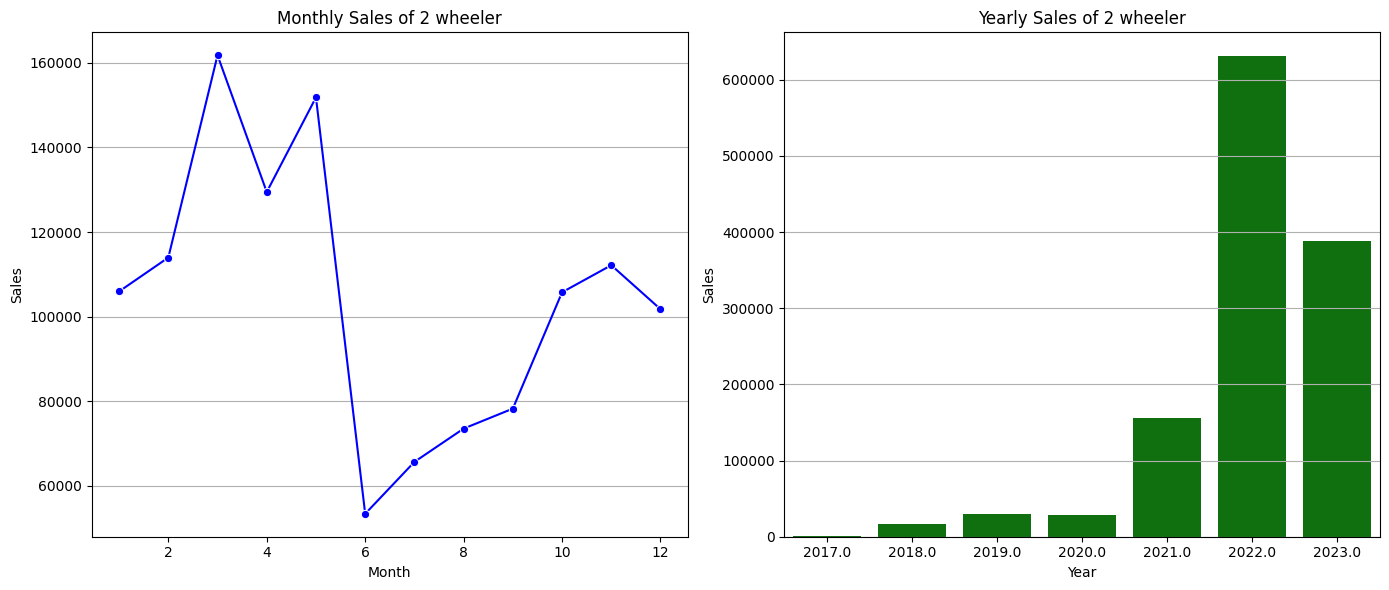

In [ ]:
yearly_sale_2w=df.groupby('Year')['2 W'].sum().reset_index()
monthly_sale_2w=df.groupby('Month')['2 W'].sum().reset_index()

plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
# Pass data as a dictionary for x and y values
sns.lineplot(x='Month', y='2 W', data=monthly_sale_2w, marker='o', linestyle='-', color='blue')
plt.title('Monthly Sales of 2 wheeler')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True, axis='y') # Use grid() and specify 'y' for vertical grid lines

plt.subplot(1,2,2) # Changed to subplot(1,2,2) to create second subplot
# Pass the entire DataFrame and specify x and y columns
sns.barplot(x='Year', y='2 W', data=yearly_sale_2w, color='green') # Use 'color' instead of 'c'
plt.title('Yearly Sales of 2 wheeler')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True, axis='y') # Use grid() and specify 'y' for vertical grid lines

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Figure size 1200x300 with 0 Axes>

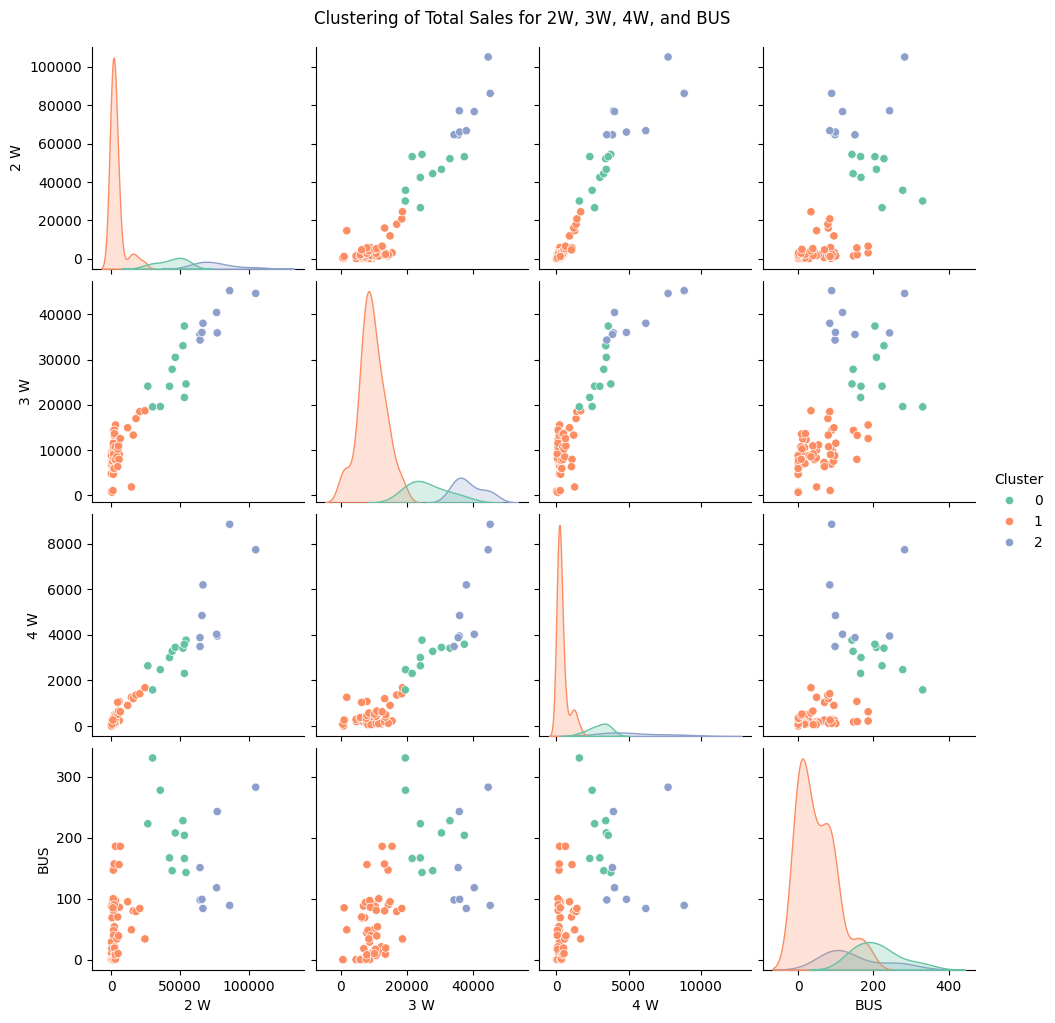

In [ ]:
# Handle missing values (replace with median for example)
sales_data = df[['2 W', '3 W', '4 W', 'BUS']].fillna(df[['2 W', '3 W', '4 W', 'BUS']].median())

# Scaling the data
scaler = StandardScaler()
scaled_sales_data = scaler.fit_transform(sales_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_sales_data)

# Visualize the clusters
plt.figure(figsize=(12, 3))
sns.pairplot(df, vars=['2 W', '3 W', '4 W', 'BUS'], hue='Cluster', palette='Set2')
plt.suptitle('Clustering of Total Sales for 2W, 3W, 4W, and BUS', y=1.02)
plt.show()